In [44]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import vector, mag, norm
from matplotlib import cm
from matplotlib.ticker import LinearLocator

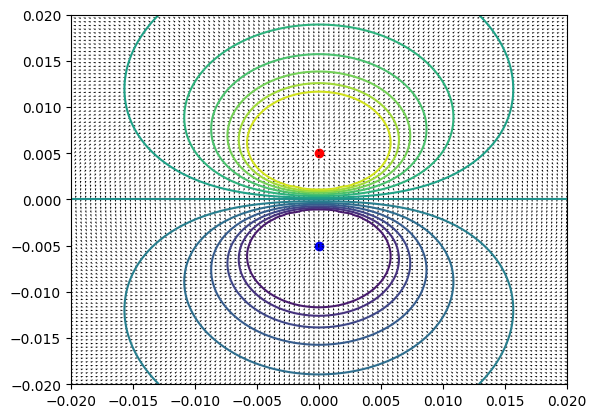

In [43]:
k = 1 #test values only
q = 1 #test
d= 0.01 #test
L = 2*d #test
rq1 = vector(0, d/2, 0)
rq2 = vector(0, -d/2, 0)
q1 = q
q2 = -q

N = 100
x = np.linspace(-L,L,N+1)
y = np.linspace(-L,L,N+1)
X,Y = np.meshgrid(x,y)
V = 0*X

EPS = 1e-8

def Ec(rot):
    r1 = rot - rq1
    r2 = rot - rq2
    d1 = mag(r1)
    d2 = mag(r2)
    if d1 < EPS: 
        d1 = EPS
    if d2 < EPS: 
        d2 = EPS
    Et = k*q1*r1/d1**3 + k*q2*r2/d2**3
    return norm(Et)

def Vc(rot):
    r1 = rot - rq1
    r2 = rot - rq2
    d1 = mag(r1)
    d2 = mag(r2)
    if d1 < EPS: d1 = EPS
    if d2 < EPS: d2 = EPS
    Vt = k*q1/d1 + k*q2/d2
    return Vt

Ex = 0*X
Ey = 0*Y
Vmax = 100
for i in range(N+1):
    for j in range (N+1):
        ro = vector(X[i,j], Y[i,j], 0)
        Ex[i][j] = Ec(ro).x
        Ey[i][j] = Ec(ro).y
        V[i][j] = Vc(ro)
        if V[i][j] > Vmax:
            V[i][j] = Vmax
        if V[i][j] < -Vmax:
            V[i][j] = -Vmax

plt.contour(X,Y,V, levels=15)
plt.scatter(rq1.x, rq1.y, color='red')
plt.scatter(rq2.x, rq2.y, color='blue')
plt.quiver(X,Y,Ex,Ey)
plt.show()


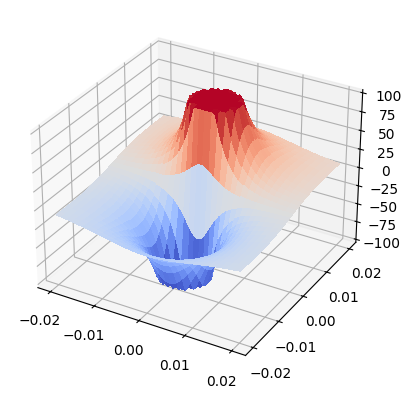

In [48]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, V, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

